WebScraper

In [1]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import plotly.express as px

In [2]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_countries_by_home_ownership_rate"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

In [4]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

  Country or Territory Home ownership rate(%) Date of Information
0              Romania                   96.1             2019[2]
1              Hungary                   91.3             2020[2]
2             Slovakia                   90.9             2019[2]
3            Lithuania                   90.3             2019[2]
4                 Cuba                     90             2014[3]


In [5]:
# drop the unwanted columns
data = df.drop(["Date of Information"], axis=1)
# rename columns for ease
data = data.rename(columns={"Country or Territory": "Country"})
data

,Country,Home ownership rate(%)
0,Romania,96.1
1,Hungary,91.3
2,Slovakia,90.9
3,Lithuania,90.3
4,Cuba,90
...,...,...
66,Switzerland,41.6
67,United Arab Emirates,28
68,Nigeria,25
69,Fiji,10


In [6]:
wealthdta = pd.read_csv('https://raw.githubusercontent.com/ujwalgurung1/ujwalgurung1.github.io/main/project/data/Wealth.csv')

In [7]:
wealthdta

,Country,Indicator,Value
0,Australia,p0p50,0.0616
1,Australia,p90p100,0.5563
2,Australia,p99p100,0.2269
3,Austria,p0p50,0.0315
4,Austria,p90p100,0.6142
...,...,...,...
73,USA,p90p100,0.7067
74,USA,p99p100,0.3487
75,United Kingdom,p0p50,0.0466
76,United Kingdom,p90p100,0.5699


In [8]:
wealthdta['Value'] = wealthdta['Value'] * 100

In [9]:
wealthdta

,Country,Indicator,Value
0,Australia,p0p50,6.16
1,Australia,p90p100,55.63
2,Australia,p99p100,22.69
3,Austria,p0p50,3.15
4,Austria,p90p100,61.42
...,...,...,...
73,USA,p90p100,70.67
74,USA,p99p100,34.87
75,United Kingdom,p0p50,4.66
76,United Kingdom,p90p100,56.99


In [10]:
merged = pd.merge(wealthdta, data, on='Country', how='left')
merged = merged.rename(columns={"Value": "Share of Net Wealth(%)"})

In [11]:
merged.loc[merged['Indicator'].str.contains('p0p50'), 'Indicator'] = 'Bottom 50%'
merged.loc[merged['Indicator'].str.contains('p90p100'), 'Indicator'] = 'Top 10%'
merged.loc[merged['Indicator'].str.contains('p99p100'), 'Indicator'] = 'Top 1%'

In [12]:
merged['Home ownership rate(%)'] = merged['Home ownership rate(%)'].astype(float)
merged['Share of Net Wealth(%)'] = merged['Share of Net Wealth(%)'].astype(float)

In [13]:
bottom50 = merged[merged['Indicator'].str.contains("Bottom 50%")]
top10 = merged[merged['Indicator'].str.contains("Top 10%")]
top1 = merged[merged['Indicator'].str.contains("Top 1%")]
top1

,Country,Indicator,Share of Net Wealth(%),Home ownership rate(%)
2,Australia,Top 1%,22.69,65.5
5,Austria,Top 1%,29.85,55.3
8,Belgium,Top 1%,14.81,72.3
11,Canada,Top 1%,24.05,68.5
14,Denmark,Top 1%,21.46,60.8
17,Finland,Top 1%,18.00,70.7
20,France,Top 1%,26.05,64.1
23,Germany,Top 1%,28.70,51.1
26,Hungary,Top 1%,33.47,91.3
29,Ireland,Top 1%,23.23,68.7


In [14]:
top10

,Country,Indicator,Share of Net Wealth(%),Home ownership rate(%)
1,Australia,Top 10%,55.63,65.5
4,Austria,Top 10%,61.42,55.3
7,Belgium,Top 10%,52.09,72.3
10,Canada,Top 10%,57.14,68.5
13,Denmark,Top 10%,50.63,60.8
16,Finland,Top 10%,55.76,70.7
19,France,Top 10%,58.93,64.1
22,Germany,Top 10%,58.99,51.1
25,Hungary,Top 10%,67.27,91.3
28,Ireland,Top 10%,66.10,68.7


In [ ]:
merged

Ploting

In [ ]:
import plotly.express as px

fig = px.scatter(merged, x="Home ownership rate(%)", y="Share of Net Wealth(%)", color="Country", facet_col="Indicator")
fig.update_layout(showlegend=False)
fig.update_xaxes(matches=None)
fig.update_layout(width=700) 
fig.update_layout(height=500) 

fig.show()
fig.write_html("ShareofWealth.html")

In [17]:
top1 = top1.dropna()
top10 = top10.dropna()
bottom50 = bottom50.dropna()

In [ ]:
import plotly.express as px


fig = px.scatter(top1, x="Home ownership rate(%)", y="Share of Net Wealth(%)", trendline="lowess")
fig.show()

REG on 3

In [ ]:
import plotly.express as px


fig = px.scatter(
    top1, x='Home ownership rate(%)', y='Share of Net Wealth(%)', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.update_layout(width=500) 
fig.update_layout(height=400) 
fig.show()
fig.write_html("ShareofWealthReg.html")

In [ ]:
fig = px.scatter(
    top10, x='Home ownership rate(%)', y='Share of Net Wealth(%)', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

In [ ]:
fig = px.scatter(
    bottom50, x='Home ownership rate(%)', y='Share of Net Wealth(%)', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

In [26]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



0.2238583919805337


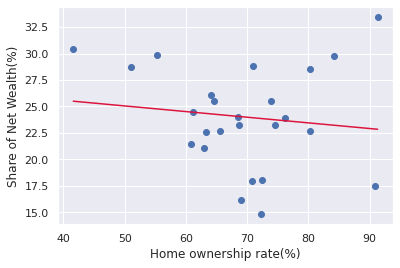

In [40]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

from sklearn.pipeline import make_pipeline

x = top1.dropna()['Home ownership rate(%)']
y = top1.dropna()['Share of Net Wealth(%)']

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('Home ownership rate(%)')
plt.ylabel('Share of Net Wealth(%)')

poly_model = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, poly_model(x)))

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



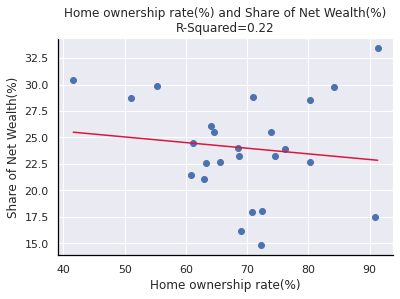

In [51]:
x = top1.dropna()['Home ownership rate(%)']
y = top1.dropna()['Share of Net Wealth(%)']

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
ax = plt.gca()


ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('black')

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.title("Home ownership rate(%) and Share of Net Wealth(%)\nR-Squared=0.22")

plt.xlabel('Home ownership rate(%)')
plt.ylabel('Share of Net Wealth(%)')

plt.savefig('Share of Net Wealth.png')

plt.savefig('Share of Net Wealth.pdf')

In [49]:
poly_model = np.poly1d(np.polyfit(x, y, 3))
print(r2_score(y, poly_model(x)))

0.2238583919805337
